<a href="https://colab.research.google.com/github/rodrigoyuji22/MinhaConsulta_app/blob/main/GS_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Importação das bibliotecas e pacotes***:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# ***Análise exploratória e manipulação dos dados***

In [ ]:
# Importação do  dataframe
df = pd.read_csv('station_data_dataverse.csv')

In [ ]:
# Preview do dataframe
df.head()

,sessionId,kwhTotal,dollars,created,ended,startTime,endTime,chargeTimeHrs,weekday,platform,...,managerVehicle,facilityType,Mon,Tues,Wed,Thurs,Fri,Sat,Sun,reportedZip
0,1366563,7.78,0.00,0014-11-18 15:40:26,0014-11-18 17:11:04,15,17,1.510556,Tue,android,...,0,3,0,1,0,0,0,0,0,0
1,3075723,9.74,0.00,0014-11-19 17:40:26,0014-11-19 19:51:04,17,19,2.177222,Wed,android,...,0,3,0,0,1,0,0,0,0,0
2,4228788,6.76,0.58,0014-11-21 12:05:46,0014-11-21 16:46:04,12,16,4.671667,Fri,android,...,0,3,0,0,0,0,1,0,0,0
3,3173284,6.17,0.00,0014-12-03 19:16:12,0014-12-03 21:02:18,19,21,1.768333,Wed,android,...,0,3,0,0,1,0,0,0,0,0
4,3266500,0.93,0.00,0014-12-11 20:56:11,0014-12-11 21:14:06,20,21,0.298611,Thu,android,...,0,3,0,0,0,1,0,0,0,0


In [ ]:
# Visualização dos tipos de dados das colunas
print(df.dtypes)

sessionId           int64
kwhTotal          float64
dollars           float64
chargeTimeHrs     float64
distance          float64
userId              int64
stationId           int64
locationId          int64
managerVehicle      int64
facilityType        int64
dtype: object


In [ ]:
# Nome das colunas do dataframe
print(df.columns)

Index(['sessionId', 'kwhTotal', 'dollars', 'created', 'ended', 'startTime',
       'endTime', 'chargeTimeHrs', 'weekday', 'platform', 'distance', 'userId',
       'stationId', 'locationId', 'managerVehicle', 'facilityType', 'Mon',
       'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'reportedZip'],
      dtype='object')


In [ ]:
# Dropando as colunas com dados categóricos
df.drop(columns=['startTime', 'endTime','created','ended','weekday','platform','Mon',
       'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'reportedZip'], inplace=True)

In [ ]:
df.head()

,sessionId,kwhTotal,dollars,chargeTimeHrs,distance,userId,stationId,locationId,managerVehicle,facilityType
0,1366563,7.78,0.00,1.510556,NaN,35897499,582873,461655,0,3
1,3075723,9.74,0.00,2.177222,NaN,35897499,549414,461655,0,3
2,4228788,6.76,0.58,4.671667,NaN,35897499,129465,461655,0,3
3,3173284,6.17,0.00,1.768333,NaN,35897499,569889,461655,0,3
4,3266500,0.93,0.00,0.298611,NaN,35897499,414088,566549,0,3


In [ ]:
print(df.isnull().sum())

sessionId            0
kwhTotal             0
dollars              0
chargeTimeHrs        0
distance          1065
userId               0
stationId            0
locationId           0
managerVehicle       0
facilityType         0
dtype: int64


In [ ]:
# Dropando os valores nulos
df.dropna()

,sessionId,kwhTotal,dollars,chargeTimeHrs,distance,userId,stationId,locationId,managerVehicle,facilityType
343,7093670,5.61,0.0,3.413056,20.695727,30828105,632920,461655,0,3
344,3730551,9.03,0.0,3.140278,20.695727,30828105,569889,461655,0,3
345,7080329,6.95,0.0,2.455278,20.695727,30828105,612116,461655,0,3
346,3829635,7.38,0.0,2.483056,20.695727,30828105,549414,461655,0,3
347,6139758,6.69,0.0,2.245833,20.695727,30828105,129465,461655,0,3
...,...,...,...,...,...,...,...,...,...,...
3390,7021565,6.74,0.0,3.463889,13.352643,59574735,884707,648339,0,2
3391,3758092,6.86,0.0,2.971389,13.352643,59574735,884707,648339,0,2
3392,5858374,6.07,0.0,3.495556,2.337085,32070852,638536,868085,0,3
3393,2586645,5.74,0.0,2.202778,4.671064,58023207,818217,700367,1,2


# ***Treinamento do Modelo SKLearn***

In [ ]:
# Selecionando quais serão as variáveis
X = df[['dollars', 'chargeTimeHrs', 'distance', 'managerVehicle', 'facilityType']]

In [ ]:
# Definindo nosso target
y = df['kwhTotal']

In [ ]:
# Divisão dos dados para teste e treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Treinando o modelo
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Fazer previsões
y_pred = model_rf.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Erro Médio Absoluto (MAE): {mae:.2f}")
print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse:.2f}")

Erro Médio Absoluto (MAE): 1.31
Erro Quadrático Médio (MSE): 5.26
Raiz do Erro Quadrático Médio (RMSE): 2.29


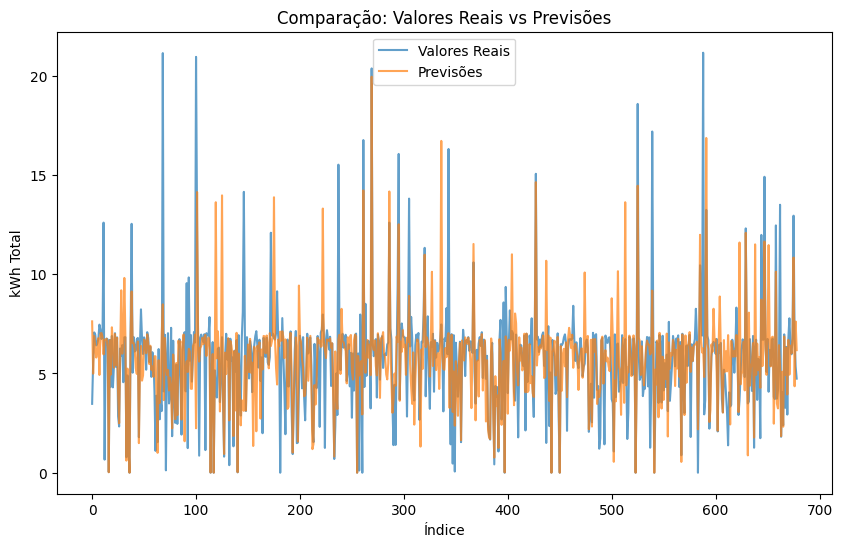

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Valores Reais', alpha=0.7)
plt.plot(y_pred, label='Previsões', alpha=0.7)
plt.legend()
plt.title('Comparação: Valores Reais vs Previsões')
plt.xlabel('Índice')
plt.ylabel('kWh Total')
plt.show()